In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams
from collections import defaultdict
import os

%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
reward_bhp = np.load("sampled_log_BayesianHybridLinUCBPER.npy")
reward_bh = np.load("sampled_log_BayesianHybridLinUCB.npy")
reward_ts = np.load("sampled_log_ts.npy")

In [3]:
print(reward_bhp.sum(), reward_bh.sum(), reward_ts.sum())

1670.0 1502.0 1232.0


In [7]:
def get_acc(rewards, bucket_size):
    n_point = int(rewards.size/bucket_size)
    return rewards.reshape((n_point, bucket_size)).sum(axis=1)

def plot_1(reward_bhp, reward_bh, reward_ts, plot_every=int(1e4)):
    bhp = get_acc(reward_bhp, plot_every)
    bh = get_acc(reward_bh, plot_every)
    ts = get_acc(reward_ts, plot_every)
    n_point = int(reward_ts.size/plot_every)
    x = list(range(1, n_point+1))
    
    rcParams.update({'figure.autolayout': True})
    rcParams['lines.linewidth'] = 3.5
    params = {'legend.fontsize': 20, 'legend.handlelength': 1.7}
    plt.rcParams.update(params)
    fig = plt.figure(figsize=(16,8))
    
    line_bhp, = plt.plot(x, bhp, color='xkcd:tomato', linestyle='-', label='Bayesian+HLUCB+PER')
    line_bh, = plt.plot(x, bh, color='xkcd:green', linestyle='-', label='Bayesian+HLUCB')
    line_ts, = plt.plot(x, ts, color='xkcd:black', linestyle='-', label='TS')
    
    plt.xlabel("Steps (Each step equal to every 10000 simulation steps)", fontsize=20)
    plt.ylabel("Accumultaed Rewards (Every 10000 Steps)", fontsize=20)
    plt.grid()
    plt.legend()
    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    plt.title("Evaluation results on sampled RAT log dataset", fontsize=20)
    plt.show()

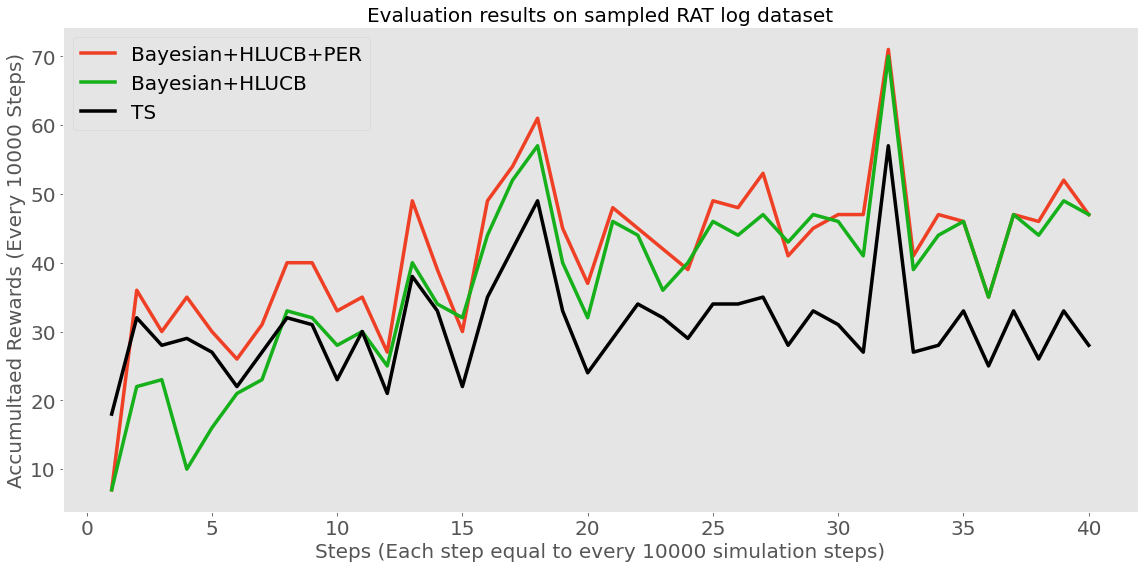

In [23]:
plot_1(reward_bhp, reward_bh, reward_ts)

In [4]:
reward_cmo_01 = np.load("sampled_log_HybridTSBHLUPER_cmo_0.1.npy")
reward_cmo_03 = np.load("sampled_log_HybridTSBHLUPER_cmo_0.3.npy")

In [6]:
print(reward_cmo_01.sum(), reward_cmo_03.sum())

1654.0 1502.0


In [8]:
def plot_2(reward_bhp, reward_cmo_01, reward_cmo_03, reward_ts, plot_every=int(1e4)):
    bhp = get_acc(reward_bhp, plot_every)
    cmo_01 = get_acc(reward_cmo_01, plot_every)
    cmo_03 = get_acc(reward_cmo_03, plot_every)
    ts = get_acc(reward_ts, plot_every)
    n_point = int(reward_ts.size/plot_every)
    x = list(range(1, n_point+1))
    
    rcParams.update({'figure.autolayout': True})
    rcParams['lines.linewidth'] = 3.5
    params = {'legend.fontsize': 20, 'legend.handlelength': 1.7}
    plt.rcParams.update(params)
    fig = plt.figure(figsize=(16,8))
    
    line_bhp, = plt.plot(x, bhp, color='xkcd:tomato', linestyle='-', label='Bayesian+HLUCB+PER')
    line_cmo_01, = plt.plot(x, cmo_01, color='xkcd:green', linestyle='-', label='Hybrid model non-log-percent-0.1')
    line_cmo_03, = plt.plot(x, cmo_03, color='xkcd:blue', linestyle='-', label='Hybrid model non-log-percent-0.3')
    line_ts, = plt.plot(x, ts, color='xkcd:black', linestyle='-', label='TS')
    
    plt.xlabel("Steps (Each step equal to every 10000 simulation steps)", fontsize=20)
    plt.ylabel("Accumultaed Rewards (Every 10000 Steps)", fontsize=20)
    plt.grid()
    plt.legend()
    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    plt.title("CMO: Evaluation results on sampled RAT log dataset", fontsize=20)
    plt.show()

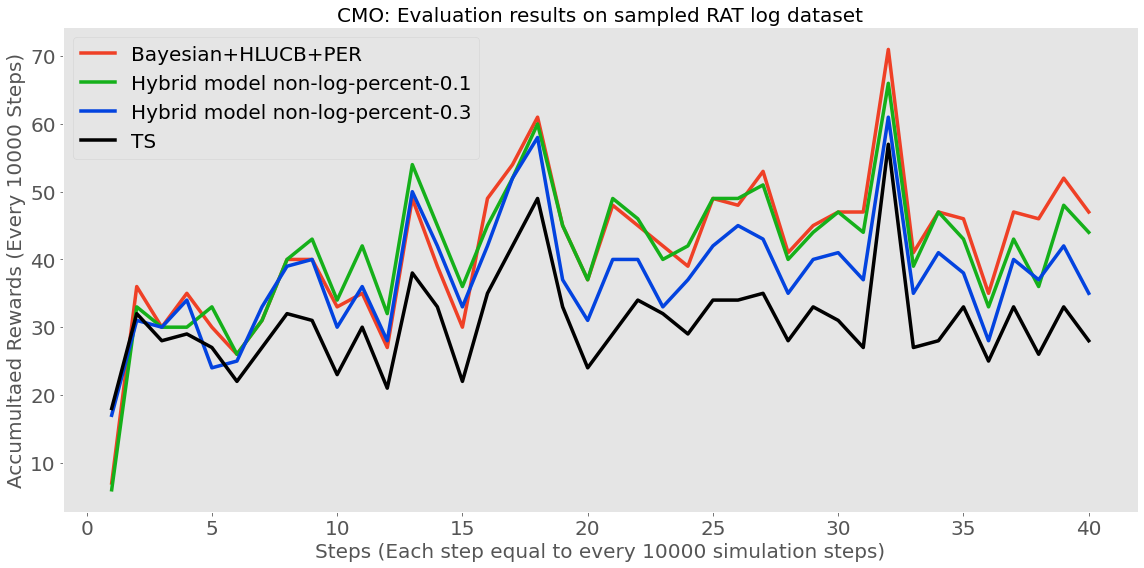

In [10]:
plot_2(reward_bhp, reward_cmo_01, reward_cmo_03, reward_ts)